### knn

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# train data
t1=time.time()
mnist_train_data_path='C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\train.csv'

train=np.genfromtxt(mnist_train_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
# np.genfromtxt - 파일로부터 배열 생성 / delimiter - 구분자 / skip_header=1 (정수까지 해당되는 라인까지 제거시켜 데이터를 입력받음)
t2=time.time()

print("Process Time: " + str(t2-t1))
print(train)

Process Time: 20.562766551971436
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [3]:
# test data
t1=time.time()
mnist_test_data_path='C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\test.csv'

test=np.genfromtxt(mnist_test_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
t2=time.time()

print("Process Time " + str(t2-t1))
print(test)

Process Time 13.301776647567749
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 데이터 분리

In [4]:
train_data=train[:,1:] # 컬럼 784개로 존재할 것 # train의 문제지
train_labels=train[:,0] # 1번째 컬럼은 라벨로 존재 # train의 정답지 

In [5]:
print(train_data)
print(train_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [6]:
# 0~9까지 데이터가 다 들어있는지 확인
# 실제로 우리가 학습시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

print(np.unique(train_labels)) # np.unique 중복되는 데이터 제거

# 학습시키려는 데이터의 분포가 균일하게 적당히 분포되었는지 확인

# method 01) numpy의 unique 이용해서 처리
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[0 1 2 3 4 5 6 7 8 9]
[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


In [7]:
t1=time.time()
# instantiate learning model ( k=3 ) -> train data 57500개 전체를 학습

# n_jobs = -1 하지 않으면 시간이 많이 걸리게 된다
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1) # n_neighbors의 디폴트 값은 5

# fitting the model - 모델 학습
knn.fit(train_data, train_labels)

# predict the model - 예측
pred=knn.predict(test)

t2=time.time()
print("Process Time : " + str(t2-t1))

Process Time : 215.63802218437195


#### PCA

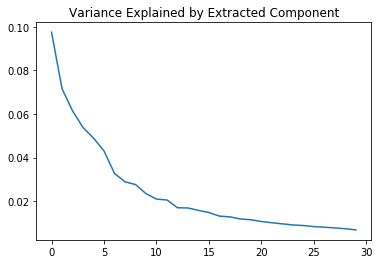

(42000, 30)
(28000, 30)


array([0.9723055 , 0.97057983, 0.97129392, 0.96870982, 0.96969697,
       0.97212693])

In [9]:
from sklearn.decomposition import PCA

num_comp=30
pca=PCA(n_components=num_comp)

pca.fit(train_data)

# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Component')
plt.show()

# extract the features
train_ext=pca.fit_transform(train_data) # 특정행렬을 낮은 차원의 근사행렬로 변환
print(train_ext.shape)

# transform the test data using the existing parameters
test_ext=pca.transform(test)
print(test_ext.shape)

min_max_scaler=MinMaxScaler()

train_norm=min_max_scaler.fit_transform(train_ext)
test_norm=min_max_scaler.fit_transform(test_ext)

knn=KNeighborsClassifier()
knn.fit(train_norm, train_labels)

from sklearn.model_selection import cross_val_score

# 시간 오래 걸림
cross_val_score(knn,train_norm,train_labels, cv=6) # model, train, target, cross validation

In [10]:
t1=time.time()

knn=KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# fitting the model - 모델 학습
knn.fit(train_norm, train_labels)

# predict the model - 예측
pred=knn.predict(test_norm)

t2=time.time()
print("Process Time : " + str(t2-t1))

Process Time : 15.395460844039917


### SVM

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# 데이터 준비
df=pd.read_csv("C:\\Users\\1-10\\Desktop\\python\\voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [13]:
# null 데이터 확인
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
# 이 데이터의 경우 마지막에 label이 있어 밑의 방법으로 처리
X=df.iloc[:,:-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [15]:
# label에 대한 변경 작업
from sklearn.preprocessing import LabelEncoder

y=df.iloc[:,-1]
# male -> 1 / female -> 0
gender_encoder=LabelEncoder()
y=gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
# 정규화 작업 진행
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)